In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from utils import import_dataset
import matplotlib.pyplot as plt

In [2]:
dataset = import_dataset()

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'genre', 'text', 'labels'],
        num_rows: 2476
    })
    eval: Dataset({
        features: ['title', 'genre', 'text', 'labels'],
        num_rows: 309
    })
    test: Dataset({
        features: ['title', 'genre', 'text', 'labels'],
        num_rows: 310
    })
})

In [4]:
classes = ['dialogues', 'dissertation', 'enquiry', 'essay', 'history', 'political discourses', 'treatise']

In [5]:
y_train = dataset['train']['labels']
y_test = dataset['test']['labels']

In [6]:
vectorizer = TfidfVectorizer(max_features=5000)
x_train = vectorizer.fit_transform(dataset['train']['text'])
x_test = vectorizer.transform(dataset['test']['text'])

In [7]:
def get_scores(pred, title):
    print(f"Accuracy: {accuracy_score(y_test,pred) * 100}%")

    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
    ax.xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6], classes, rotation=60)
    ax.yaxis.set_ticks([0, 1, 2, 3, 4, 5, 6], classes)
    plt.title(title)

In [8]:
def print_history_mistakes(pred):
    for i in range(len(y_test)):
        t = y_test[i]
        p = pred[i]

        if t == 4 and p != 4:
            print(f'history for {classes[p]}', i)
            print(dataset['test'][i])
            print()
        elif p == 4 and t != 4:
            print(f'{classes[t]} for history', i)
            print(dataset['test'][i])
            print()

# SVM

In [9]:
from sklearn.svm import SVC

Accuracy: 73.87096774193549%


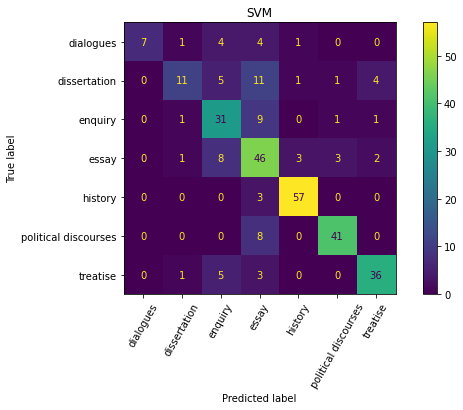

In [10]:
model = SVC()
model.fit(x_train,y_train)
svm_pred = model.predict(x_test)
get_scores(svm_pred, 'SVM')
# print_history_mistakes(svm_pred)

In [11]:
# it mostly mistakes essay-like things for essay-like things

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

Accuracy: 75.16129032258064%


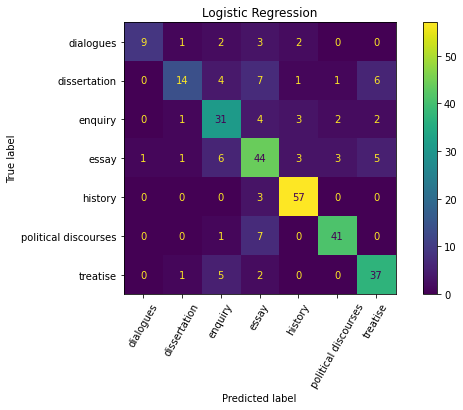

In [13]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
logreg_pred = clf.predict(x_test)
get_scores(logreg_pred, 'Logistic Regression')
# print_history_mistakes(logreg_pred)

# Decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 42.90322580645161%


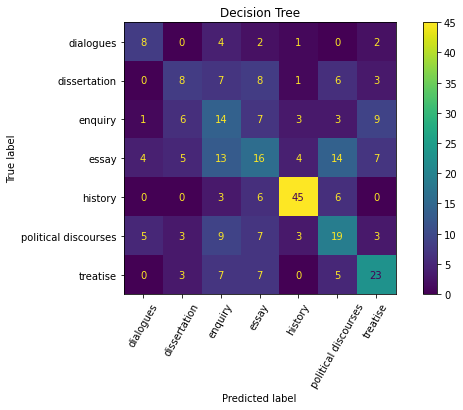

In [15]:
clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
dectree_pred = clf.predict(x_test)
get_scores(dectree_pred, 'Decision Tree')
# print_history_mistakes(logreg_pred)

# Gradient boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

Accuracy: 67.74193548387096%


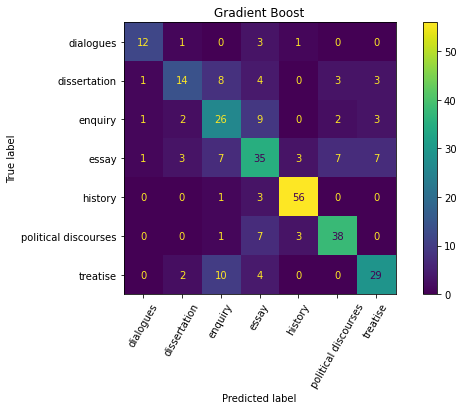

In [17]:
clf = GradientBoostingClassifier(random_state=0).fit(x_train, y_train)
gboost_pred = clf.predict(x_test)
get_scores(gboost_pred, 'Gradient Boost')

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 47.41935483870968%


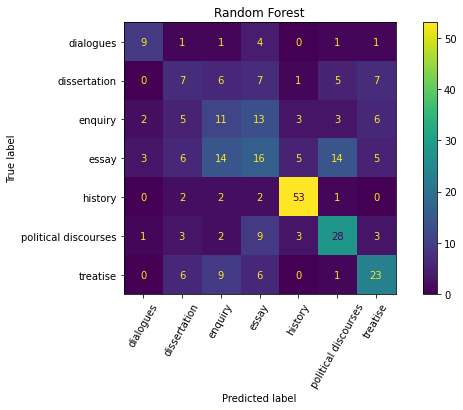

In [19]:
clf = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)
randfor_pred = clf.predict(x_test)
get_scores(randfor_pred, 'Random Forest')